Summary of Predictor and Response Variables

Setup

In [16]:
import importlib
from hot_dust import preprocess

In [17]:
ds = preprocess.prepare_training_data()
ds

<xarray.Dataset>
Dimensions:                 (npoints: 10000, nbands_viirs: 3)
Coordinates:
  * nbands_viirs            (nbands_viirs) float32 8.5e+03 1.08e+04 1.2e+04
Dimensions without coordinates: npoints
Data variables:
    solar_zenith_angle      (npoints) float32 ...
    viewing_zenith_angle    (npoints) float32 ...
    relative_azimuth_angle  (npoints) float32 ...
    viirs_bts               (nbands_viirs, npoints) float32 ...
    dust_optical_thickness  (npoints) float32 ...
    spress                  (npoints) float32 ...
    h2o                     (npoints) float32 ...
    o3                      (npoints) float32 ...
    ws                      (npoints) float32 ...
    ts                      (npoints) float32 ...
Attributes:
    description:             Radiative transfer-based labelled training data ...
    suffix:                  nc
    version:                 Created 20230713
    contact_person_address:  NASA/GSFC, Mail Code 616, 8800 Greenbelt Road, G...
    contact_person_email:     andrew.sayer@nasa.gov
    contact_person_name:      Andrew Sayer
    contact_person_role:     Scientific/technical contact
    data_set_language:       en
    file_format:             NetCDF4

In [18]:
# Read in the data to obtain the BTS values
btd_ds = ds['viirs_bts']  
# Define the bands 
M14_band = btd_ds[0] 
M15_band = btd_ds[1]
M16_band = btd_ds[-1] 
# Subtract the bands to get the BTD bands
BTD14_15 = M14_band-M15_band 
BTD14_16 = M14_band-M16_band 
BTD15_16 = M15_band-M16_band 

Predictor Values

In [19]:
preprocess.feature_histogram(ds["spress"])

:NdOverlay   [Element]
   :Histogram   [spress]   (spress_count)

In [20]:
preprocess.feature_histogram(ds["solar_zenith_angle"])

:NdOverlay   [Element]
   :Histogram   [solar_zenith_angle]   (solar_zenith_angle_count)

In [21]:
preprocess.feature_histogram(ds["viewing_zenith_angle"])

:NdOverlay   [Element]
   :Histogram   [viewing_zenith_angle]   (viewing_zenith_angle_count)

In [22]:
preprocess.feature_histogram(ds["relative_azimuth_angle"])

:NdOverlay   [Element]
   :Histogram   [relative_azimuth_angle]   (relative_azimuth_angle_count)

In [23]:
preprocess.feature_histogram(ds["viirs_bts"])

:NdOverlay   [Element]
   :Histogram   [viirs_bts]   (viirs_bts_count)

In [24]:
preprocess.feature_histogram(ds["ts"])

:NdOverlay   [Element]
   :Histogram   [ts]   (ts_count)

In [25]:
import numpy as np
solzen_ds = ds["solar_zenith_angle"] 
cos_solzen=np.cos(np.radians(solzen_ds))   

preprocess.feature_histogram(cos_solzen)

:NdOverlay   [Element]
   :Histogram   [solar_zenith_angle]   (solar_zenith_angle_count)

Response Variable

In [26]:
preprocess.feature_histogram(ds["dust_optical_thickness"])

:NdOverlay   [Element]
   :Histogram   [dust_optical_thickness]   (dust_optical_thickness_count)

Predictors v. Response

BTD Histograms

In [27]:
preprocess.feature_histogram(BTD14_15)

:NdOverlay   [Element]
   :Histogram   [viirs_bts]   (viirs_bts_count)

In [28]:
preprocess.feature_histogram(BTD14_16)

:NdOverlay   [Element]
   :Histogram   [viirs_bts]   (viirs_bts_count)

In [29]:
preprocess.feature_histogram(BTD15_16)

:NdOverlay   [Element]
   :Histogram   [viirs_bts]   (viirs_bts_count)

TypeError: Image data of dtype <U6 cannot be converted to float

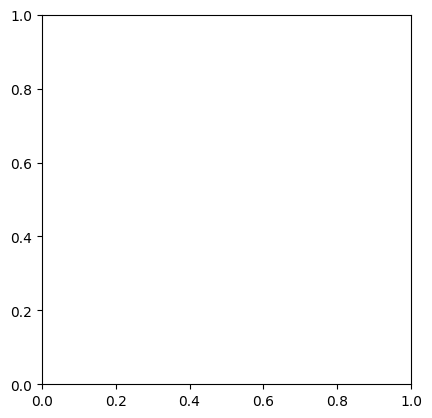

In [30]:
preprocess.heat_map('spress')

Heat Maps

mse 
multivariant regrssien 
11 inputs 
visulazations to track model practive  
btd histogram  
2d histograms  
purine version approach 
    - there is no way to give weight to the inputs/ variables 
    - normalization 
    - 1 absolute 
    - 3 bands  


